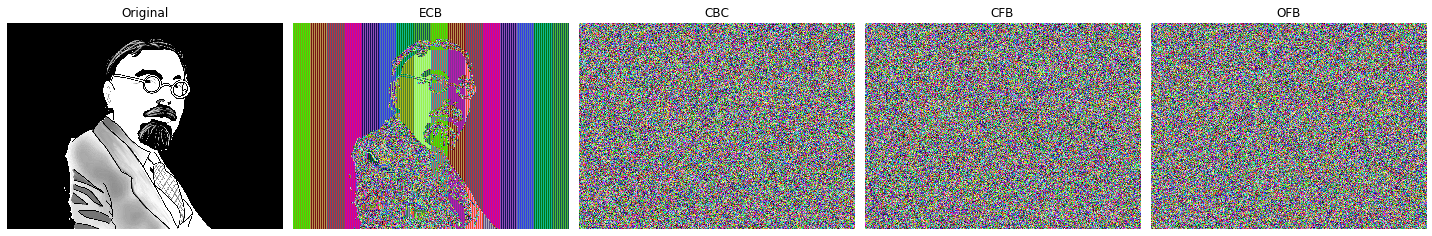

In [3]:
# Imports
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding as crypto_padding
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load image and convert to RGB bytes
def load_image_as_bytes(path):
    img = Image.open(path).convert("RGB")
    data = np.array(img)
    return data, data.tobytes(), img.size

# AES block size is 128 bits = 16 bytes
BLOCK_SIZE = 16

# Padding for AES block size
def pad_data(data):
    padder = crypto_padding.PKCS7(128).padder()
    padded = padder.update(data) + padder.finalize()
    return padded

# ECB mode encryption
def encrypt_ecb(data, key):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    encryptor = cipher.encryptor()
    padded_data = pad_data(data)
    ciphertext = encryptor.update(padded_data) + encryptor.finalize()
    return ciphertext

# CBC mode encryption
def encrypt_cbc(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    padded_data = pad_data(data)
    ciphertext = encryptor.update(padded_data) + encryptor.finalize()
    return ciphertext


# CFB mode encryption
def encrypt_cfb(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    padded_data = pad_data(data)
    ciphertext = encryptor.update(padded_data) + encryptor.finalize()
    return ciphertext

# OFB mode encryption
def encrypt_ofb(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.OFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    padded_data = pad_data(data)
    ciphertext = encryptor.update(padded_data) + encryptor.finalize()
    return ciphertext

# Convert encrypted bytes to image (truncate padding if needed)
def encrypted_bytes_to_image(enc_bytes, size):
    # RGB = 3 bytes per pixel
    pixel_count = size[0] * size[1] * 3
    trimmed = enc_bytes[:pixel_count]
    arr = np.frombuffer(trimmed, dtype=np.uint8)
    return Image.fromarray(arr.reshape((size[1], size[0], 3)))

# Load and encrypt the image
image_path = "Norbert_Wiener.png"  # Replace with a visible structured image
original_array, data_bytes, size = load_image_as_bytes(image_path)

# Generate AES key and IV
key = os.urandom(16)  # AES-128
iv = os.urandom(16)

# Encrypt in both modes
ecb_encrypted = encrypt_ecb(data_bytes, key)
cbc_encrypted = encrypt_cbc(data_bytes, key, iv)

# Convert to images
ecb_img = encrypted_bytes_to_image(ecb_encrypted, size)
cbc_img = encrypted_bytes_to_image(cbc_encrypted, size)


# Encrypt in CFB and OFB modes
cfb_encrypted = encrypt_cfb(data_bytes, key, iv)
ofb_encrypted = encrypt_ofb(data_bytes, key, iv)

# Convert to images
cfb_img = encrypted_bytes_to_image(cfb_encrypted, size)
ofb_img = encrypted_bytes_to_image(ofb_encrypted, size)


plt.figure(figsize=(20, 4))

plt.subplot(1, 5, 1)
plt.title("Original")
plt.imshow(original_array)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title("ECB")
plt.imshow(ecb_img)
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title("CBC")
plt.imshow(cbc_img)
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title("CFB")
plt.imshow(cfb_img)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title("OFB")
plt.imshow(ofb_img)
plt.axis('off')

plt.tight_layout()
plt.show()



In [4]:
def unpad_data(data):
    unpadder = crypto_padding.PKCS7(128).unpadder()
    unpadded = unpadder.update(data) + unpadder.finalize()
    return unpadded


In [5]:
def decrypt_ecb(ciphertext, key):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    decryptor = cipher.decryptor()
    padded_data = decryptor.update(ciphertext) + decryptor.finalize()
    return unpad_data(padded_data)

def decrypt_cbc(ciphertext, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    padded_data = decryptor.update(ciphertext) + decryptor.finalize()
    return unpad_data(padded_data)

def decrypt_cfb(ciphertext, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    padded_data = decryptor.update(ciphertext) + decryptor.finalize()
    return unpad_data(padded_data)

def decrypt_ofb(ciphertext, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.OFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    padded_data = decryptor.update(ciphertext) + decryptor.finalize()
    return unpad_data(padded_data)


In [6]:
def decrypted_bytes_to_image(plain_bytes, size):
    arr = np.frombuffer(plain_bytes[:size[0] * size[1] * 3], dtype=np.uint8)
    return Image.fromarray(arr.reshape((size[1], size[0], 3)))

In [7]:
ecb_decrypted = decrypt_ecb(ecb_encrypted, key)
cbc_decrypted = decrypt_cbc(cbc_encrypted, key, iv)
cfb_decrypted = decrypt_cfb(cfb_encrypted, key, iv)
ofb_decrypted = decrypt_ofb(ofb_encrypted, key, iv)

ecb_decrypted_img = decrypted_bytes_to_image(ecb_decrypted, size)
cbc_decrypted_img = decrypted_bytes_to_image(cbc_decrypted, size)
cfb_decrypted_img = decrypted_bytes_to_image(cfb_decrypted, size)
ofb_decrypted_img = decrypted_bytes_to_image(ofb_decrypted, size)


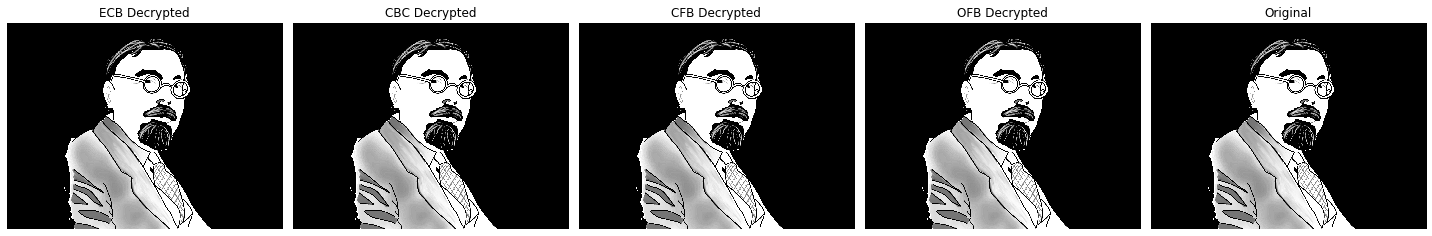

In [8]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 5, 1)
plt.title("ECB Decrypted")
plt.imshow(ecb_decrypted_img)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title("CBC Decrypted")
plt.imshow(cbc_decrypted_img)
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title("CFB Decrypted")
plt.imshow(cfb_decrypted_img)
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title("OFB Decrypted")
plt.imshow(ofb_decrypted_img)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title("Original")
plt.imshow(original_array)
plt.axis('off')

plt.tight_layout()
plt.show()
